# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [391]:
# Bot check

# HW_ID: fpmi_ad6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$. 

**5.** При каких условиях дисперсии в пункте 4 конечны? Подумайте и ответьте на вопрос, как ведет себя дисперсия предсказания в многомерном случае если матрица $X^T X$ близка к вырожденной.



*Замечания.* 
1. В пунктах 3-5 речь идет о $\widehat{\theta}$, которая является *решением* задачи метода наименьших квадратов. Поэтому пользуйтесь явной формулой этого решения, а не формулами методов вычисления решения.
2. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
3. **Прочитай требования к формату решения в правилах сдачи задания.**

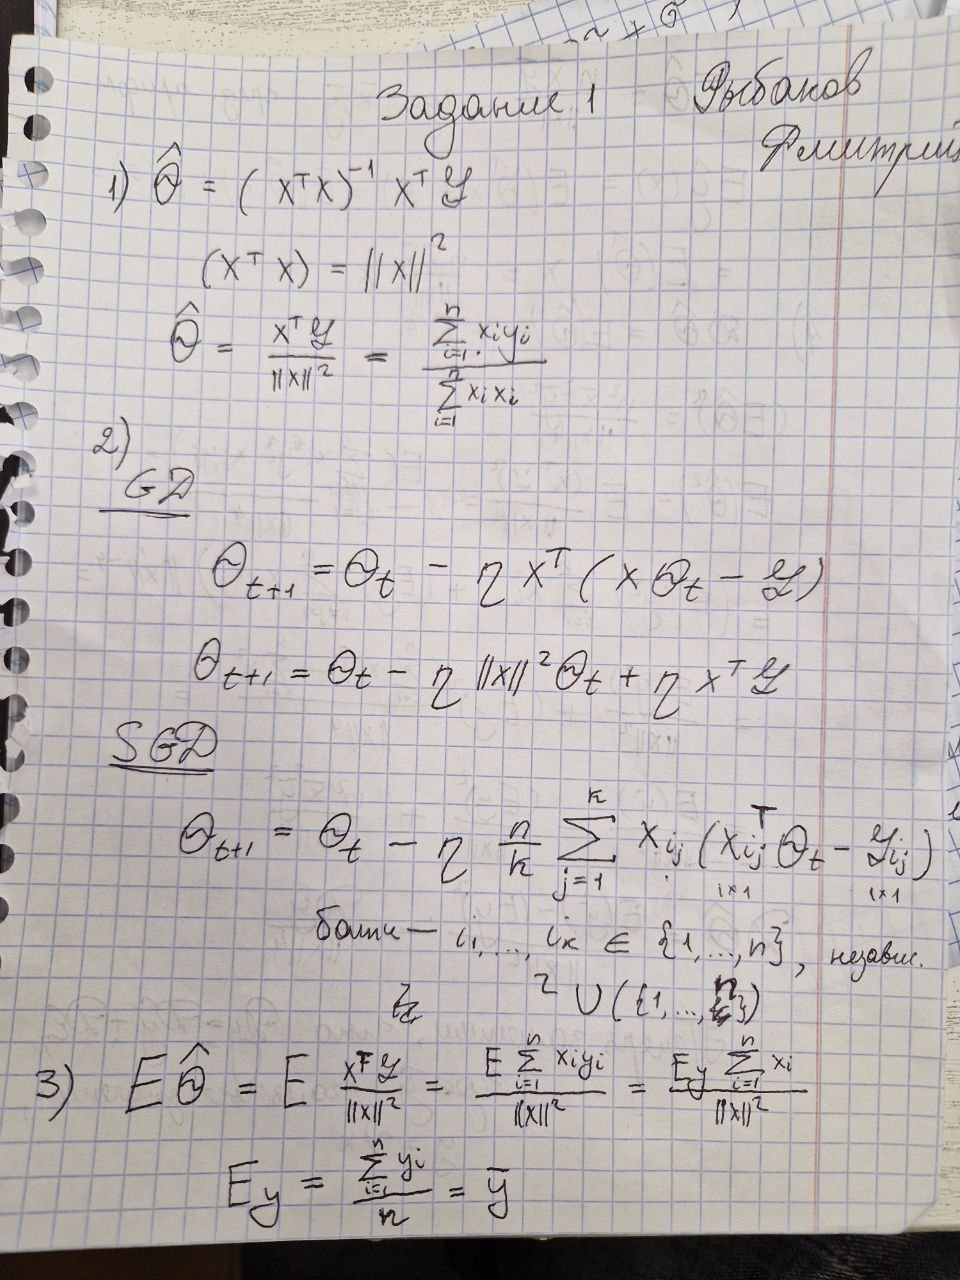

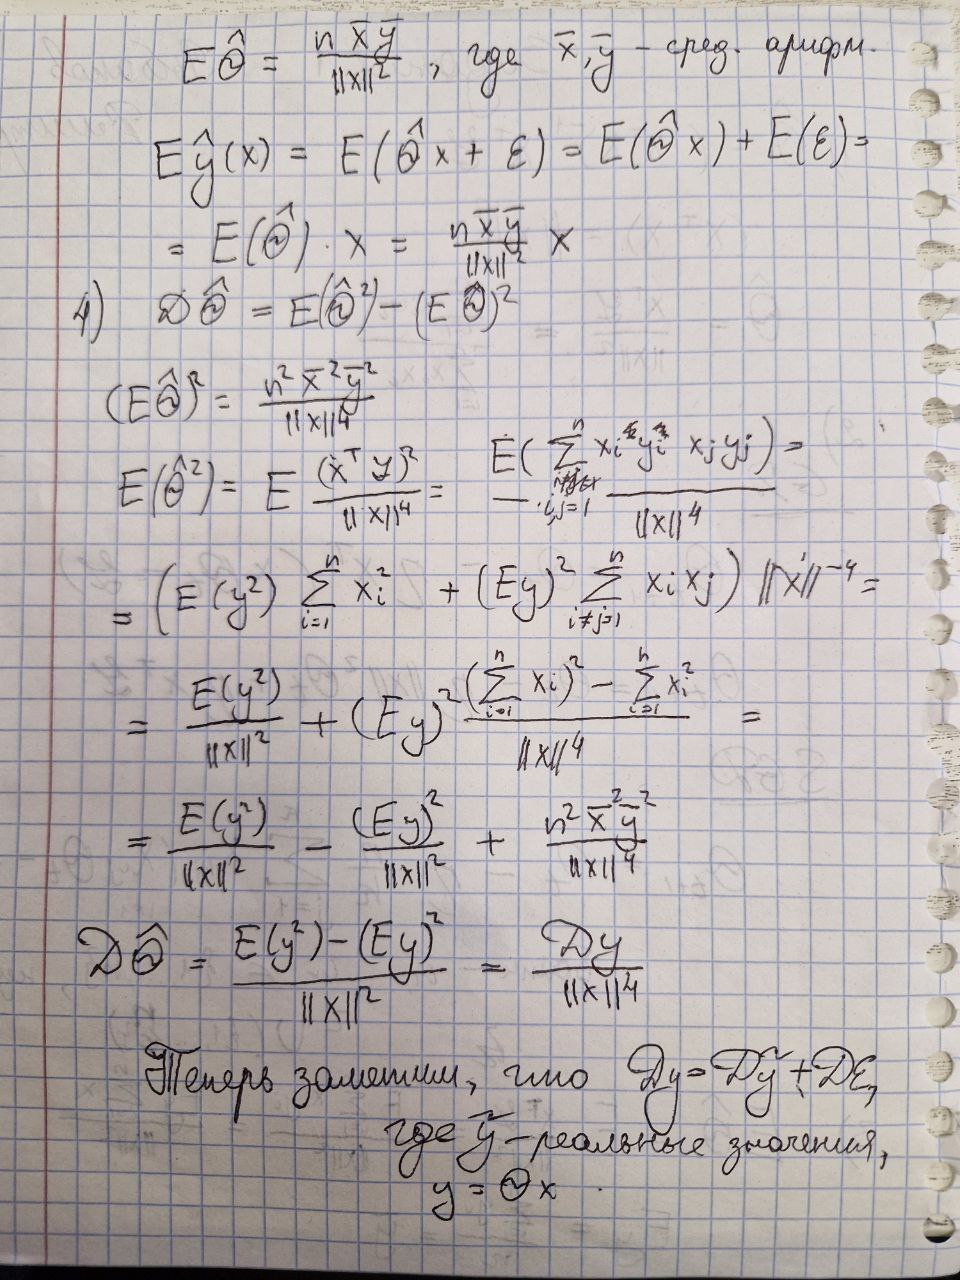

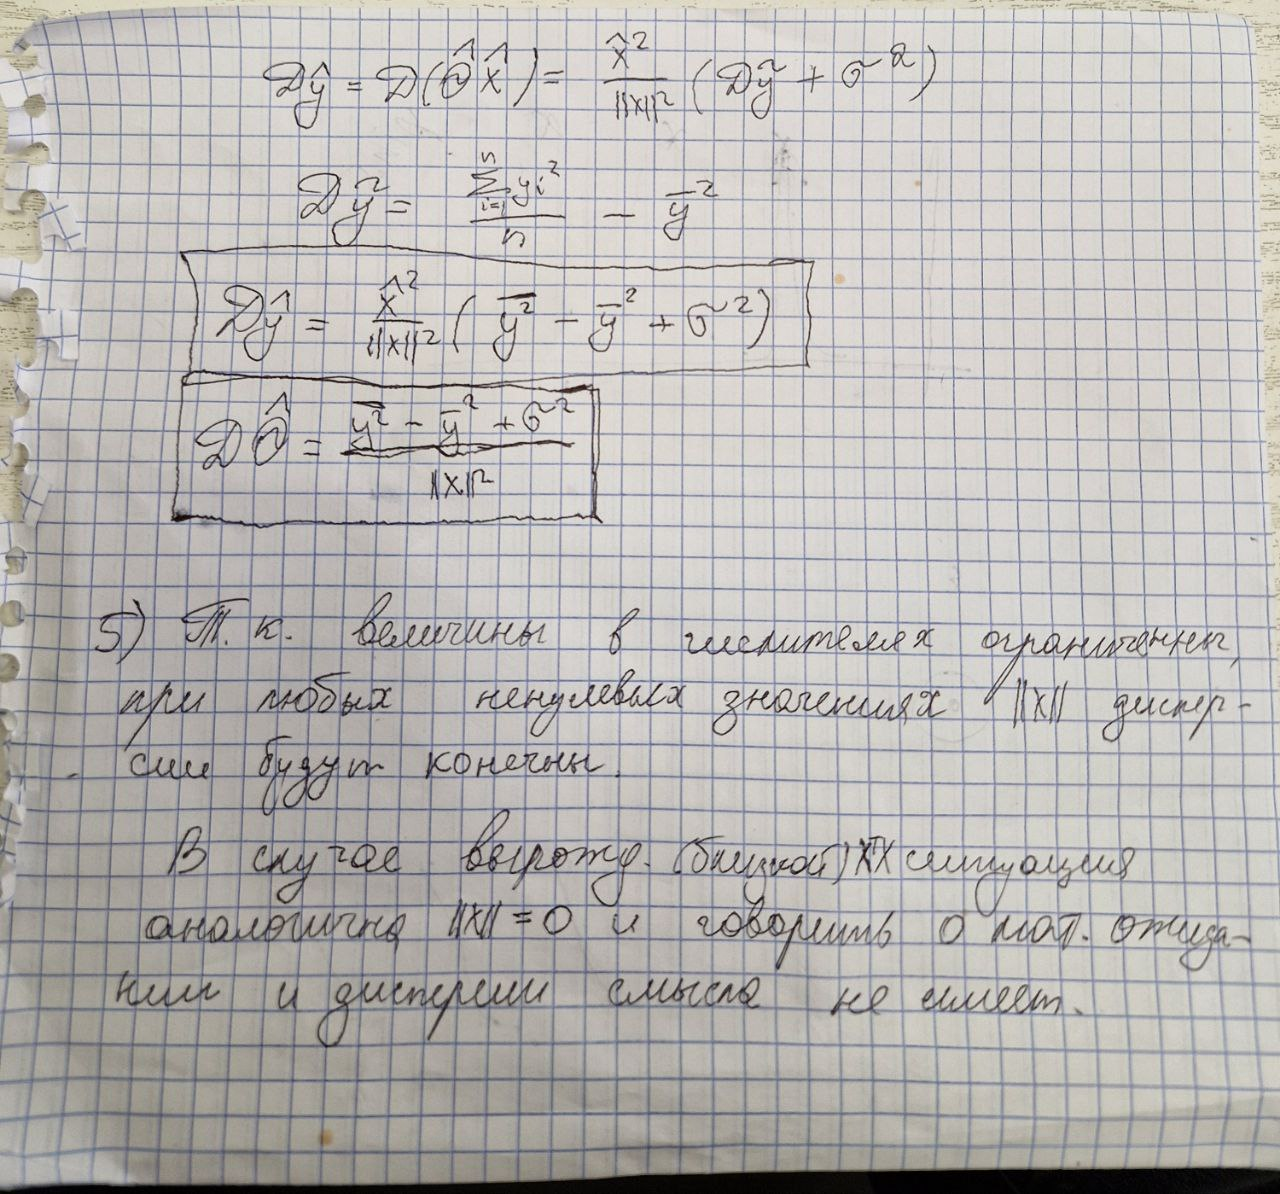

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

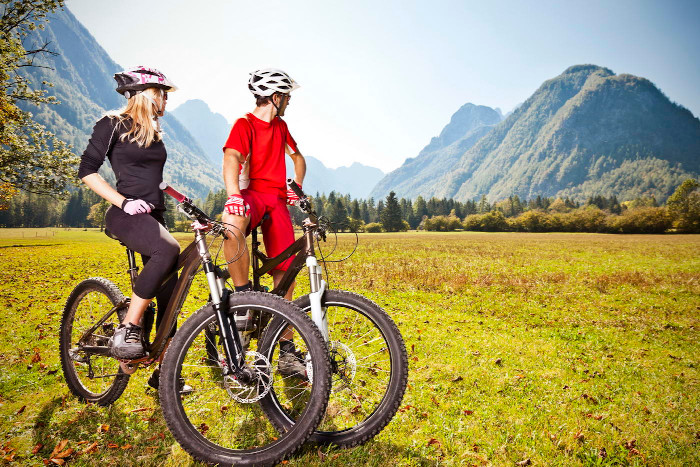

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [394]:
day_df = pd.read_csv('day.csv', parse_dates=[0])

In [395]:
todrop = ['instant', 'dteday', 'yr', 'casual', 'registered']
day_df.drop(inplace=True, columns=todrop, axis=1)
day_df

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed   cnt  
0    0.363625  0.805833   0.160446   985  
1    0.353739  0.696087   0.248539   801  
2    0.189405  0.437273   0.248309  1349  
3    0.212122  0.590435   0.160296  1562  
4    0.229270  0.436957   0.186900  1600  
..        ...       ...        ...   ...  
726  0.226642  0.652917   0.350133  2114  
727  0.255046  0.590000   0.155471  3095  
728  0.242400  0.752917   0.124383  1341  
729  0.231700  0.483333   0.350754  1796  
730  0.223487  0.577500   0.154846  2729  

[731 rows x 11 columns]

In [396]:
train, test = train_test_split(day_df, test_size=0.2)

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строит информативные графики.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [397]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

In [398]:
train

season  mnth  holiday  weekday  workingday  weathersit      temp  \
414       1     2        0        0           0           2  0.280000   
334       4    12        0        4           1           1  0.312500   
197       3     7        0        0           0           1  0.719167   
570       3     7        0        2           1           1  0.750833   
358       1    12        0        0           0           1  0.274783   
..      ...   ...      ...      ...         ...         ...       ...   
572       3     7        0        4           1           1  0.776667   
499       2     5        0        1           1           2  0.573333   
185       3     7        0        2           1           1  0.746667   
638       4     9        0        0           0           1  0.526667   
408       1     2        0        1           1           1  0.222500   

        atemp       hum  windspeed   cnt  
414  0.265788  0.515833   0.253112  2689  
334  0.305554  0.524583   0.220158  3727  
197  0.669833  0.604167   0.245033  5302  
570  0.706450  0.655000   0.211454  7592  
358  0.279961  0.681304   0.155091   754  
..        ...       ...        ...   ...  
572  0.739263  0.596667   0.284813  6861  
499  0.549900  0.789583   0.212692  2843  
185  0.696338  0.590417   0.126258  4665  
638  0.517663  0.583333   0.134958  6889  
408  0.227913  0.411250   0.167283  3422  

[584 rows x 11 columns]

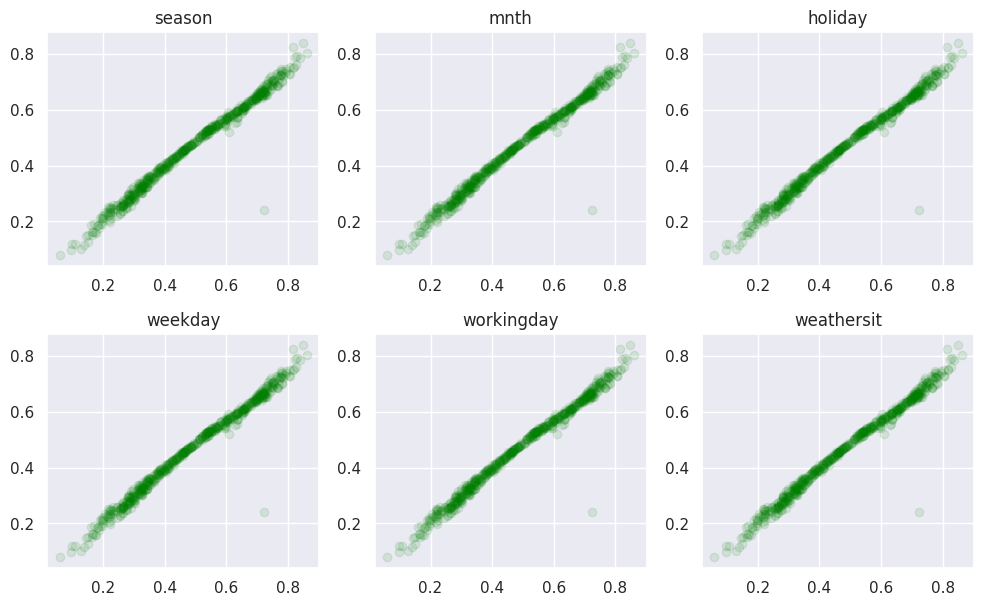

In [399]:
plt.figure(figsize=(10, 15))
sns.set(style='darkgrid')
for i, hue in enumerate(categorial_features):
    plt.subplot(5, 3, i + 1)
    plt.scatter(train['temp'], train['atemp'], alpha=0.1, color='green')
    plt.title(hue)
plt.tight_layout()
plt.show()

Как можно заметить, для всех категориальных признаков реальная температура и температруа по ощущениям почти не отличаются друг от друга, поэтому для анализа влияния на целевой признак можно использовать только один из них, например temp.

In [400]:
real_features.remove('atemp')
train.drop(columns='atemp', inplace=True)
test.drop(columns='atemp', inplace=True)

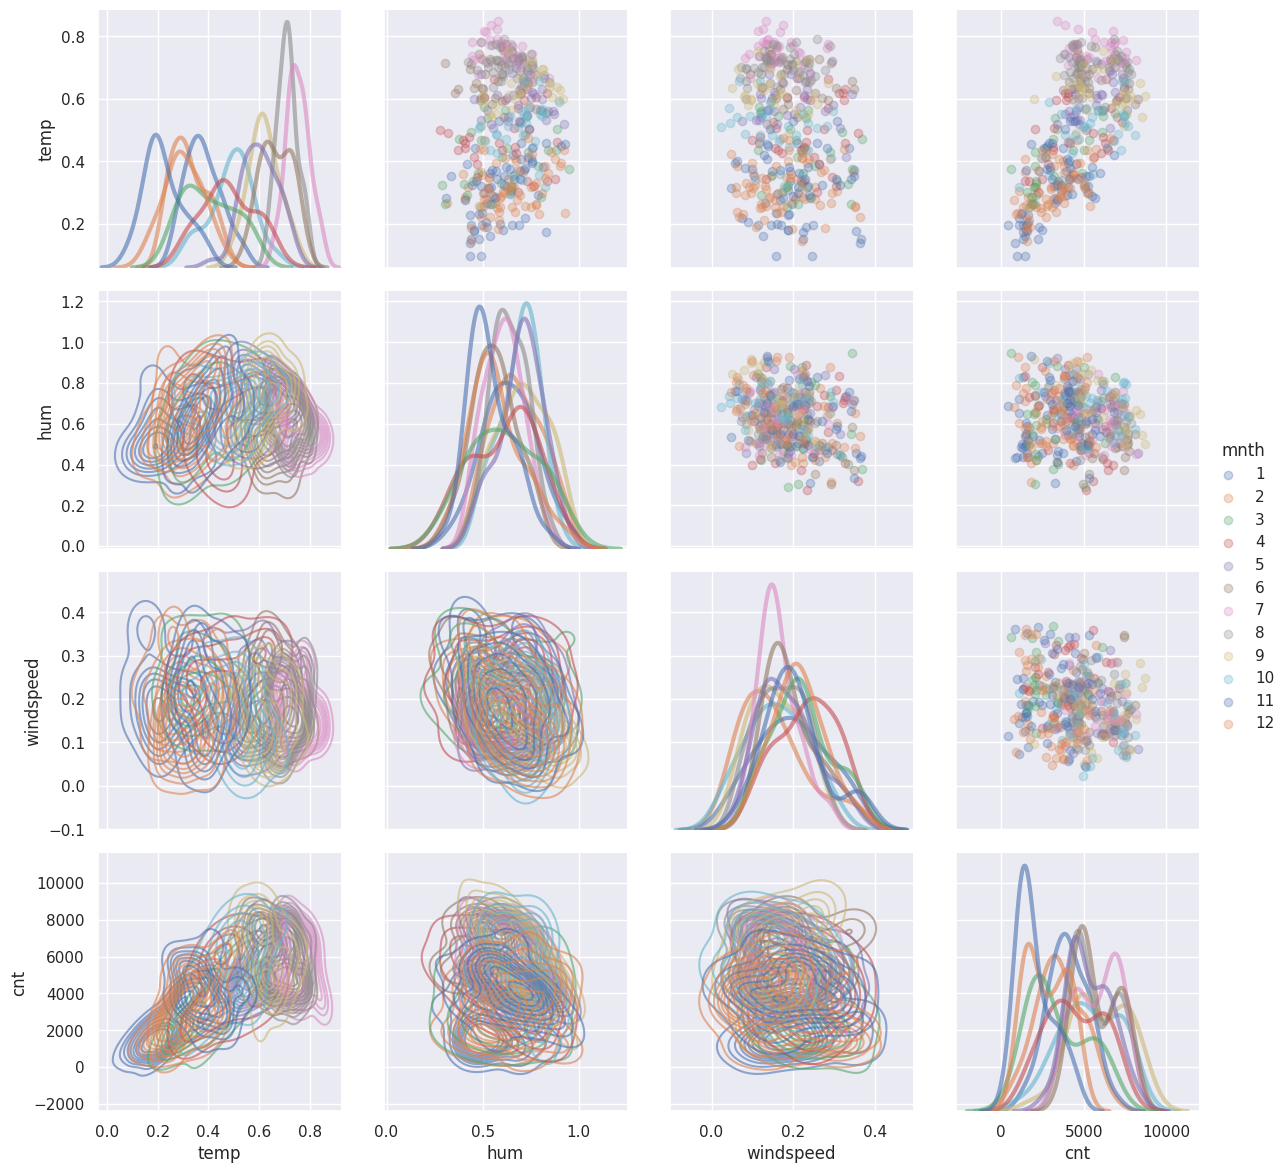

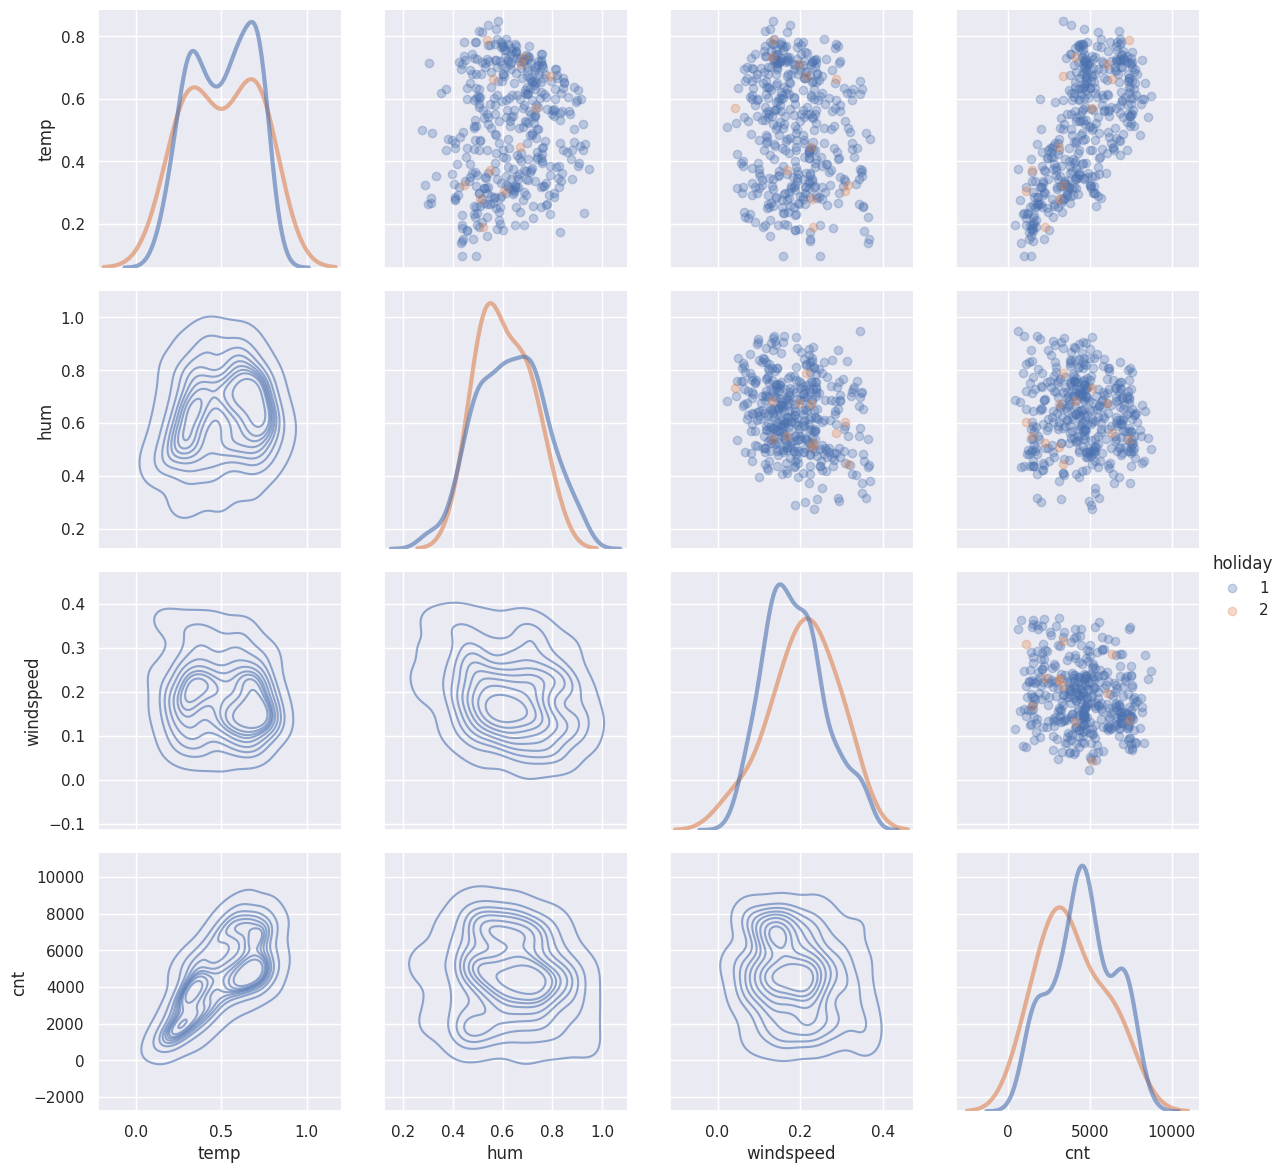

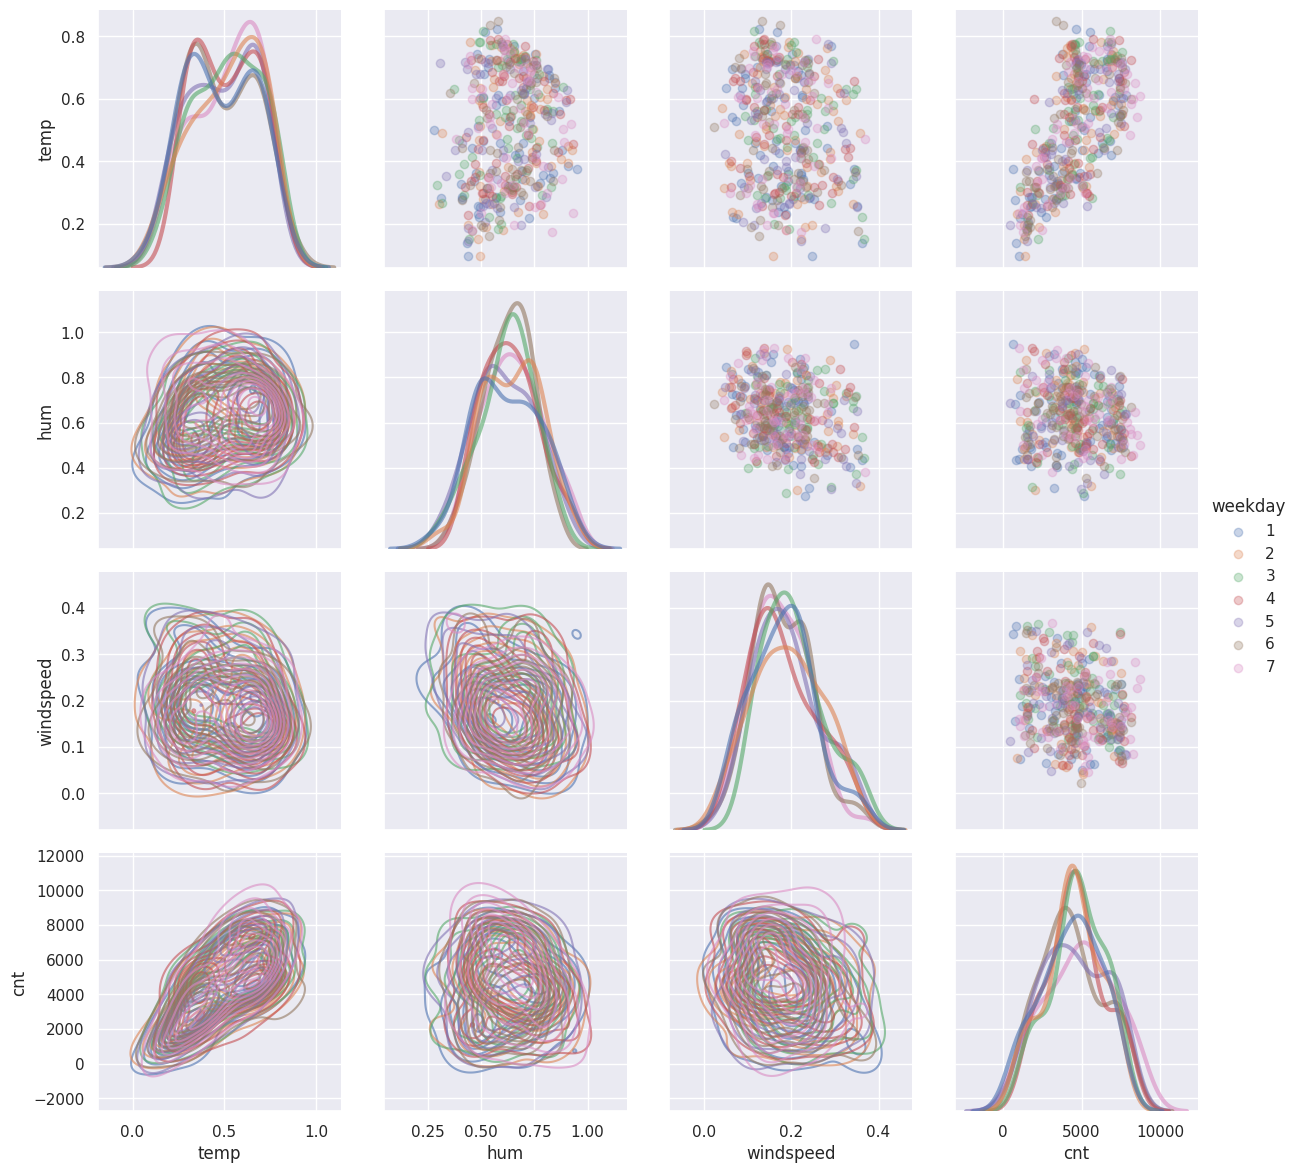

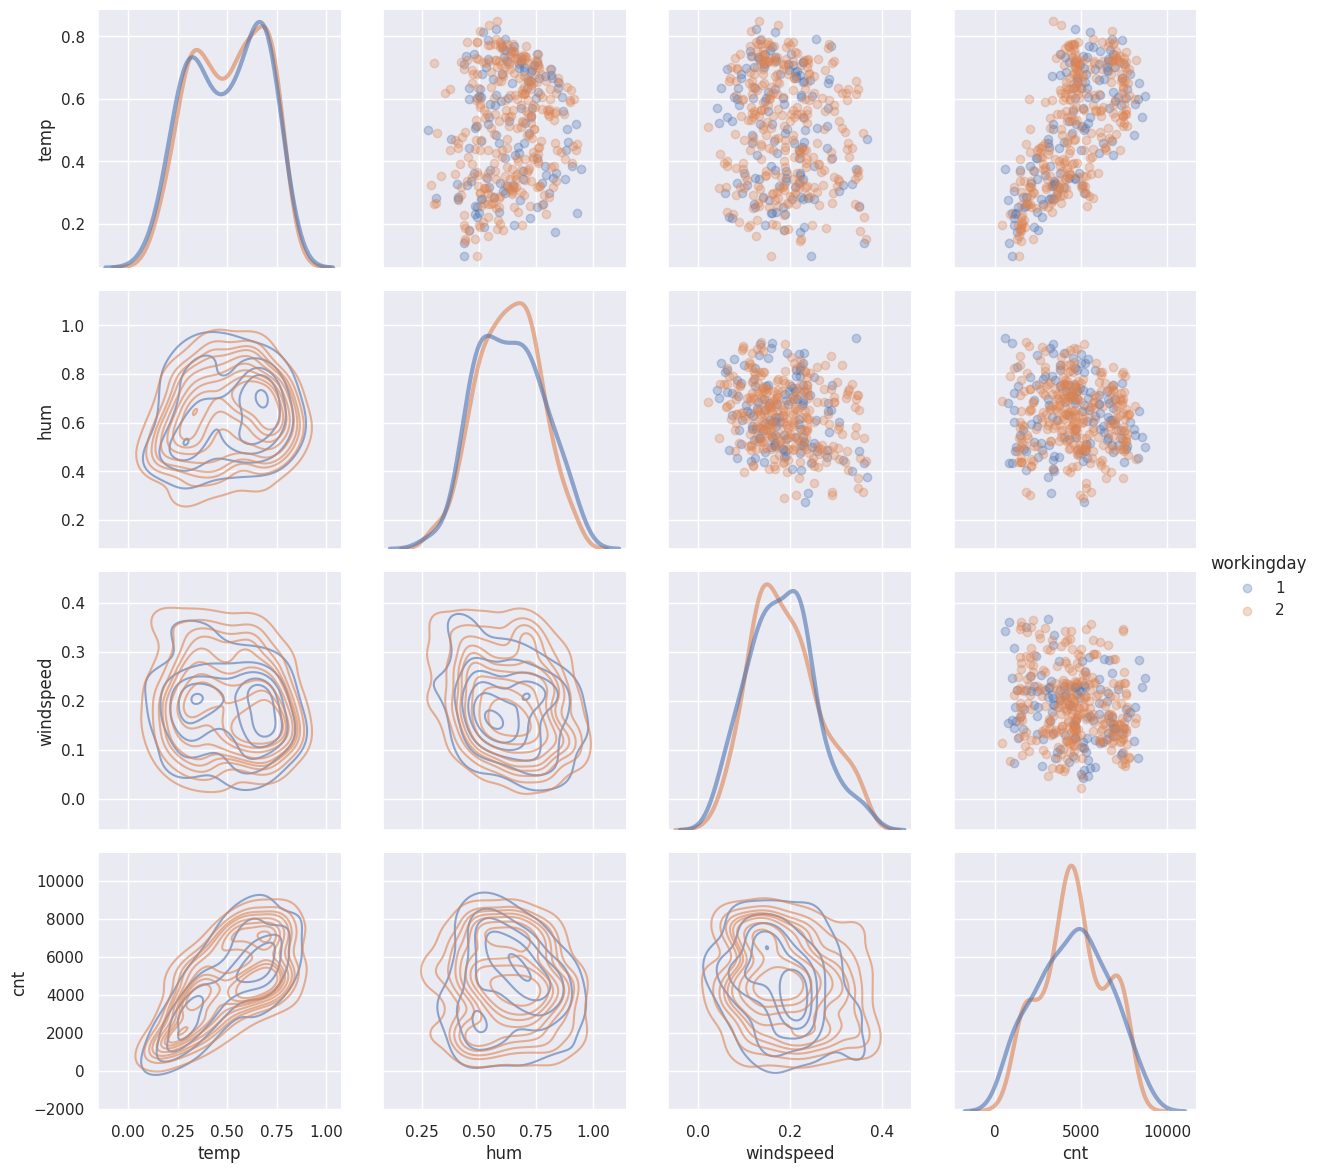

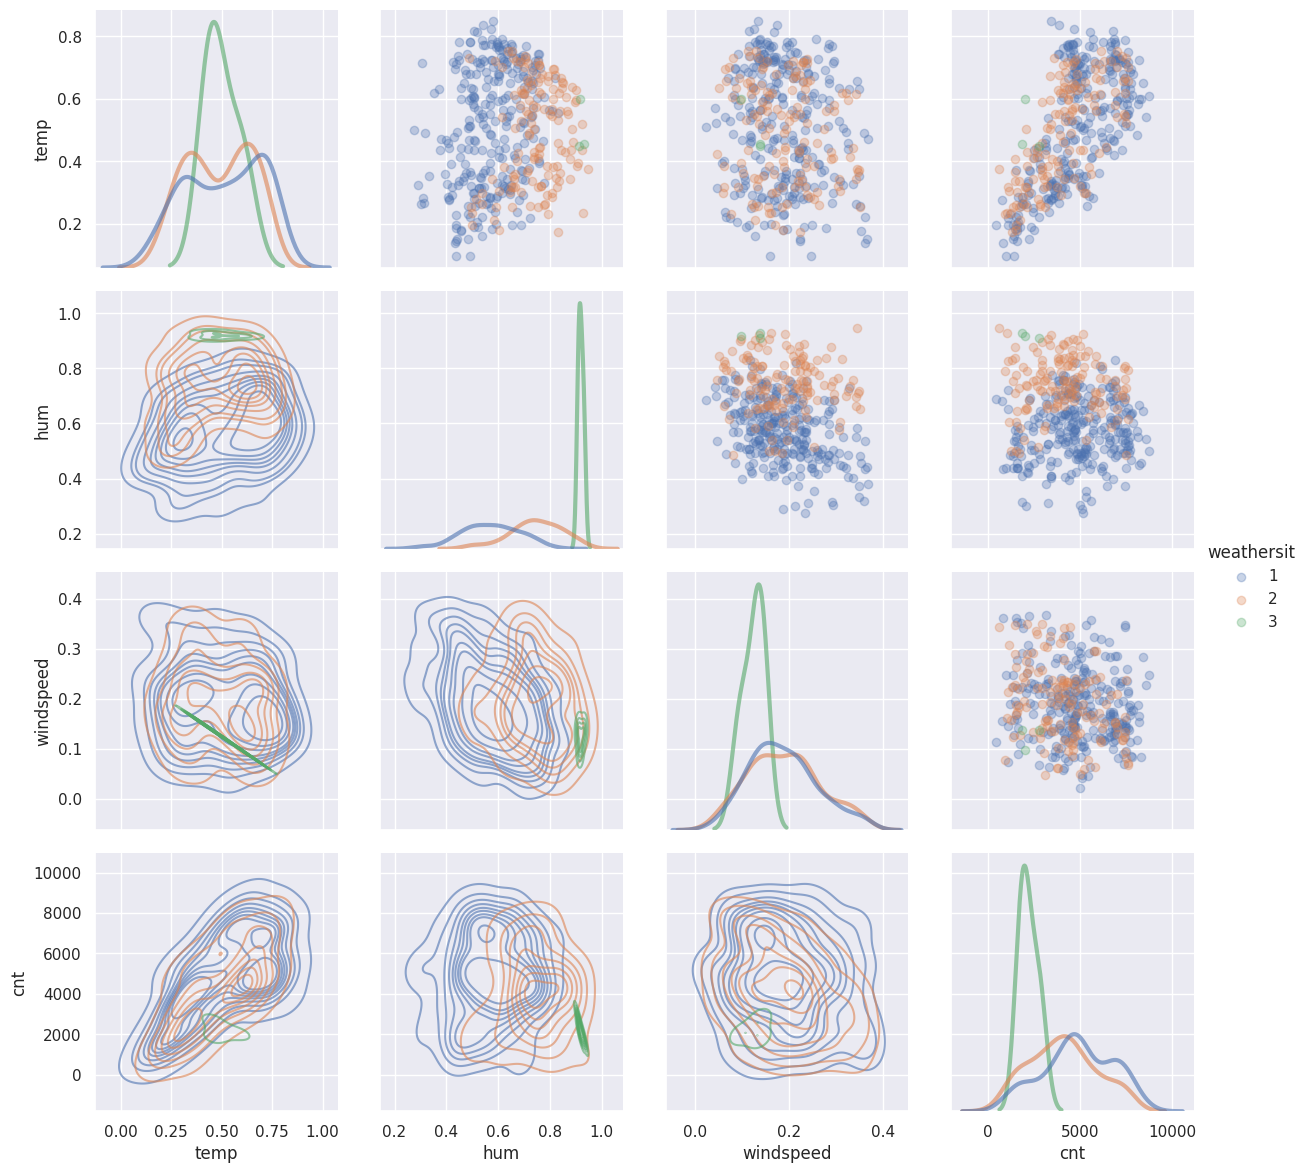

In [647]:
for hue in categorial_features:
    g = sns.PairGrid(train[real_features + [target_feature] + [hue]], 
                     hue=hue, diag_sharey=False, height=3, palette='deep')
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)
    
    g.add_legend()

Зависимость целевого признака от месяца является более информативной, чем от времени года. Тем не менее, вторая зависимость наглядней. При наличии среди признаков месяца
для дальнейшего использования season бесполезен, поэтому стоит его убрать из списка исследуемых.

In [401]:
categorial_features.remove('season')
train.drop(columns='season', inplace=True)
test.drop(columns='season', inplace=True)

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

**а)** Из категориальных признаков наблюдается зависимость от месяца (также, соответственно, времени года) и благоприятности погоды.

**б)** Из вещественных признаков ни один не описывается простейшими нелинейными функциями, поэтому будем аппроксимировать зависимость линейной. Похожая картина наблюдается на графике температуры от cnt.

**в)** Выбросы присутствуют, но не влияют на масштаб графиков и общую картину.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**а)** Для обработки выбросов посмотрим на каждый категориальный признак и сгруппируем данные по его значению, посчитав квантили для каждого значения каждого признака. Подвинув границы для попадания большего количества данных можем удалить все значения, не попадающие в интервал для каждой категории. Проделываем эту операциию для каждого вещественного признака. Это нужно для того, чтобы удалять выбросы для разных выборок по-отдельности, так как выбросы для одной могут не быть выбросами для другой и более грубые удаления будут не совсем корректны.

**б)** Используем OneHotEncoder для перекодировки категориальных признаков.

Реализуйте данную процедуру.

In [402]:
train['holiday'] = train['holiday'].apply(lambda x: x + 1)
train['weekday'] = train['weekday'].apply(lambda x: x + 1)
train['workingday'] = train['workingday'].apply(lambda x: x + 1)

for hue in categorial_features:  # режем данные для удаления выбросов по осям вещественных признаков
    for real_hue in (real_features  + [target_feature]):
        low_q = train[[hue] + [real_hue]].groupby(hue).quantile(0.25)
        high_q = train[[hue] + [real_hue]].groupby(hue).quantile(0.75)
        dif = 1.5 * (high_q - low_q)
        low_q -= dif
        high_q += dif
        train['high_q'] = train[hue].apply(lambda x: high_q[real_hue].iloc[int(x) - 1])
        train['low_q'] = train[hue].apply(lambda x: low_q[real_hue].iloc[int(x) - 1])
        train = train[(train['low_q'] < train[real_hue]) & (train['high_q'] > train[real_hue])]
        train = train.drop(columns=['high_q', 'low_q'])

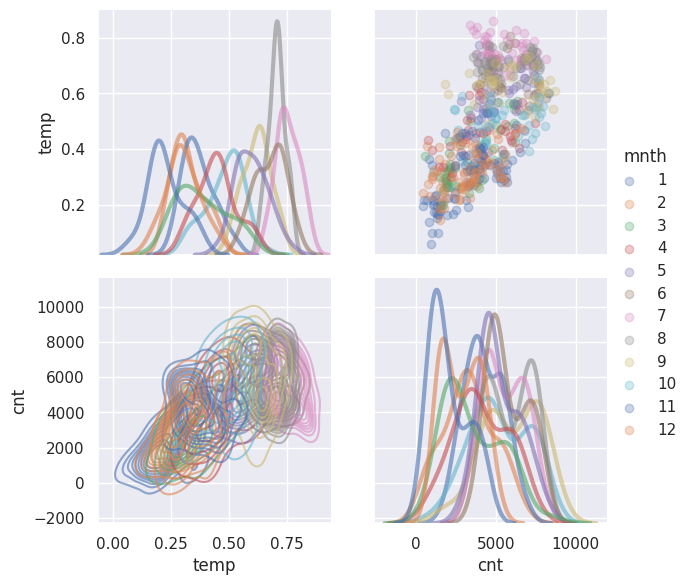

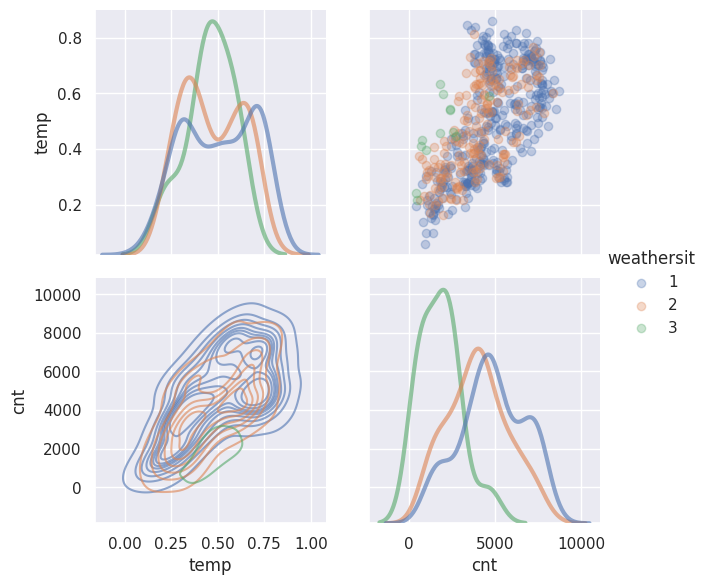

In [403]:
for hue in ['mnth', 'weathersit']:
    g = sns.PairGrid(train[['temp'] + [target_feature] + [hue]], 
                     hue=hue, diag_sharey=False, height=3, palette='deep')
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)
    
    g.add_legend()

Заметим, что выбросов действительно стало визуально меньше.

In [404]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
encoder.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([1, 2]),
 array([1, 2, 3])]

In [405]:
train[real_features].shape

(547, 3)

In [406]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(547, 24)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [407]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, train[target_feature])

LinearRegression()

Предсказание:

In [408]:
model.coef_

array([ 7.12854907e+03, -3.71803872e+03, -3.48414077e+03,  1.89542085e+02,
        3.84002463e+02,  7.11240028e+02,  8.07810766e+02,  2.84062604e+02,
       -3.73096043e+02,  4.15138041e+02,  1.52422492e+03,  1.68398786e+03,
        1.32601362e+03,  8.62367471e+02, -5.13685732e+02, -5.01404353e+01,
        6.92567642e+00,  6.86609655e+01, -1.45317838e+02,  1.85882690e+01,
        5.87720039e+02,  4.12402370e+02, -1.02462799e+02, -1.91342184e+03])

In [409]:
model.intercept_

3066.5545480404153

Убираем выбросы в тестовой выборке и кодируем признаки:

In [410]:
real_features

['temp', 'hum', 'windspeed']

In [411]:
test.columns

Index(['mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [412]:
test['holiday'] = test['holiday'].apply(lambda x: x + 1)
test['weekday'] = test['weekday'].apply(lambda x: x + 1)
test['workingday'] = test['workingday'].apply(lambda x: x + 1)

for hue in categorial_features:  # режем данные для удаления выбросов по вещественным осям
    for real_hue in (real_features):
        low_q = test[[hue] + [real_hue]].groupby(hue).quantile(0.25)
        high_q = test[[hue] + [real_hue]].groupby(hue).quantile(0.75)
        dif = 1.5 * (high_q - low_q)
        low_q -= dif
        high_q += dif
        test['high_q'] = test[hue].apply(lambda x: high_q[real_hue].iloc[int(x) - 1])
        test['low_q'] = test[hue].apply(lambda x: low_q[real_hue].iloc[int(x) - 1])
        test = test[(test['low_q'] < test[real_hue]) & (test['high_q'] > test[real_hue])]
        test = test.drop(columns=['high_q', 'low_q'])

In [413]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

In [414]:
test_preds = model.predict(X_test)

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

RMSE:

In [415]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5

1387.7580343551929

MAE:

In [416]:
metrics.mean_absolute_error(test[target_feature], test_preds)

1195.7944902259762

MAPE:

In [417]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [418]:
mean_absolute_percentage_error(test[target_feature], test_preds)

28.34626156657855

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [419]:
X = X_train
Y = train[target_feature].to_numpy()
X = np.hstack((X, np.ones(len(X)).reshape(len(X), 1)))

Увидим, что матрица $X^{T}X$ не близка к вырожденной, т.к. её детерминант не близок к 0. Проблема могла возникнуть из-за того что столбцы являются линейно зависимыми (с точностью до выбросов), но мы её уже решили, удалив лишний столбцец atemp во время обработки данных.

In [420]:
np.linalg.det(X.T @ X)

-7.75472361895435e+22

In [421]:
Theta = np.linalg.inv(X.T @ X) @ X.T @ Y
Theta

array([ 4363.90281612, -3698.11779925,  4237.78425896,   639.09036452,
         547.71368914,   842.74166108,  1232.27789036,   411.89857246,
        -254.43653821,   706.70253481,  2008.04228732,  2150.66088095,
        1548.43182388,   723.98988534,  2426.50663507, -4010.27534435,
        -365.4588886 , -2782.80978586, -2356.04152173,  -906.950772  ,
         587.72003919,  1675.36992483,  -102.46279944, -1913.42184474,
        3066.55454804])

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [422]:
X2 = X_test
Y2 = test[target_feature].to_numpy()
X2 = np.hstack((X2, np.ones(len(X_test)).reshape(len(test), 1)))
prediction = X2 @ Theta

In [423]:
RMSE = ((Y2 - prediction) ** 2).mean()
np.sqrt(RMSE)

1934.5258308421703

In [424]:
MAE = (np.abs(Y2 - prediction)).mean()
MAE

1556.4197580869918

In [425]:
MAPE = (np.abs(Y2 - prediction) / Y2).mean() * 100
MAPE

40.94761472113696

Сделайте выводы.

**Выводы:** Мы посчитали оценку коэффициентов с помощью формулы МНК и класса LinearRegression из sklearn. Далее при помощи этих результатов получили предсказания целевого признака и оценки точности этого предсказания. Для класса LinearRegression результат получился значительно точнее. Это можно объяснить дополнительными методами предобработки данных, содержащимися в классе.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

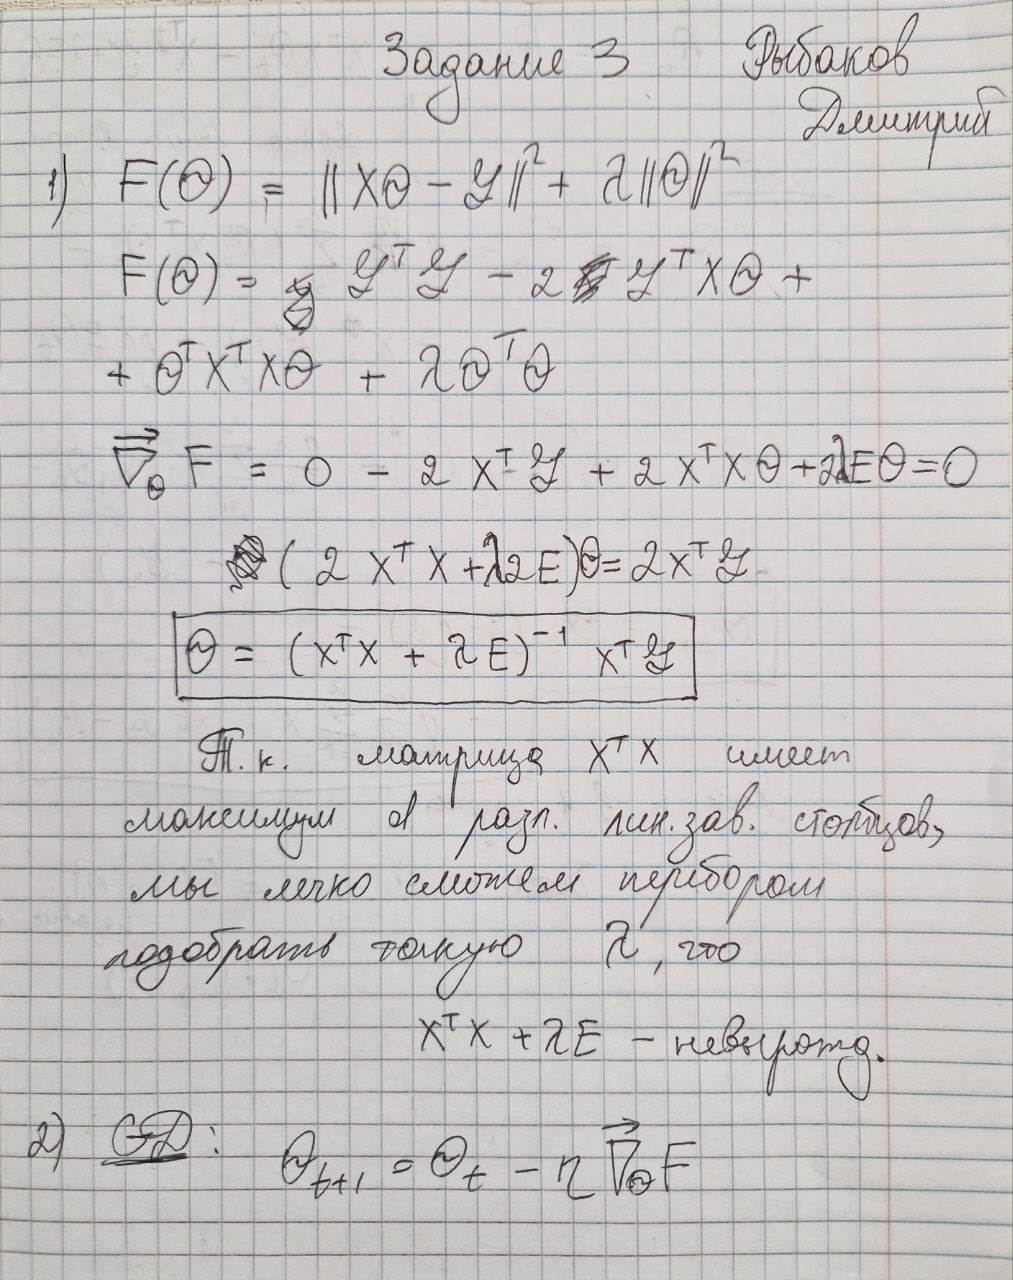

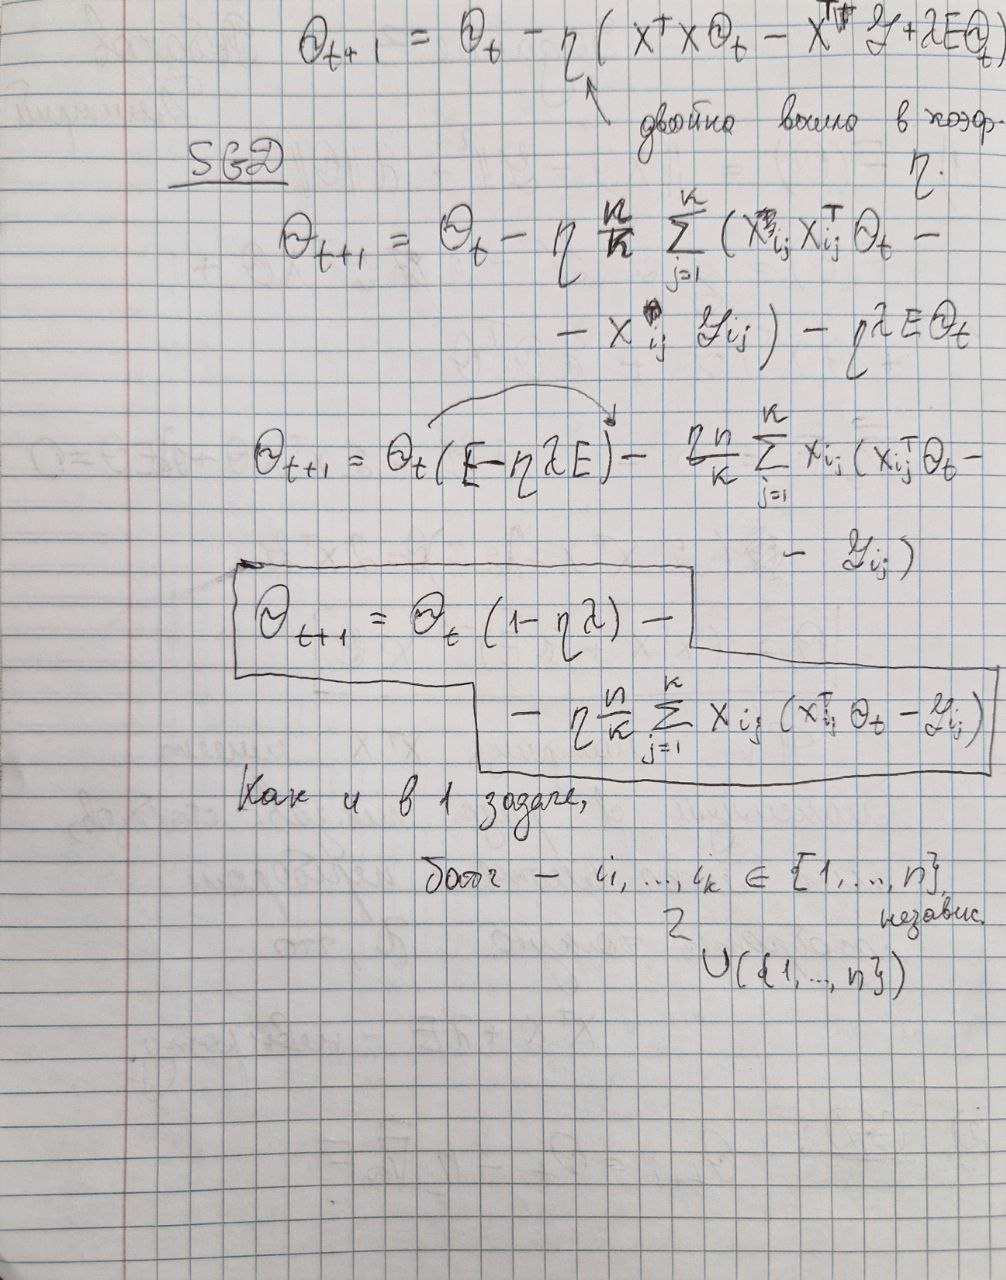

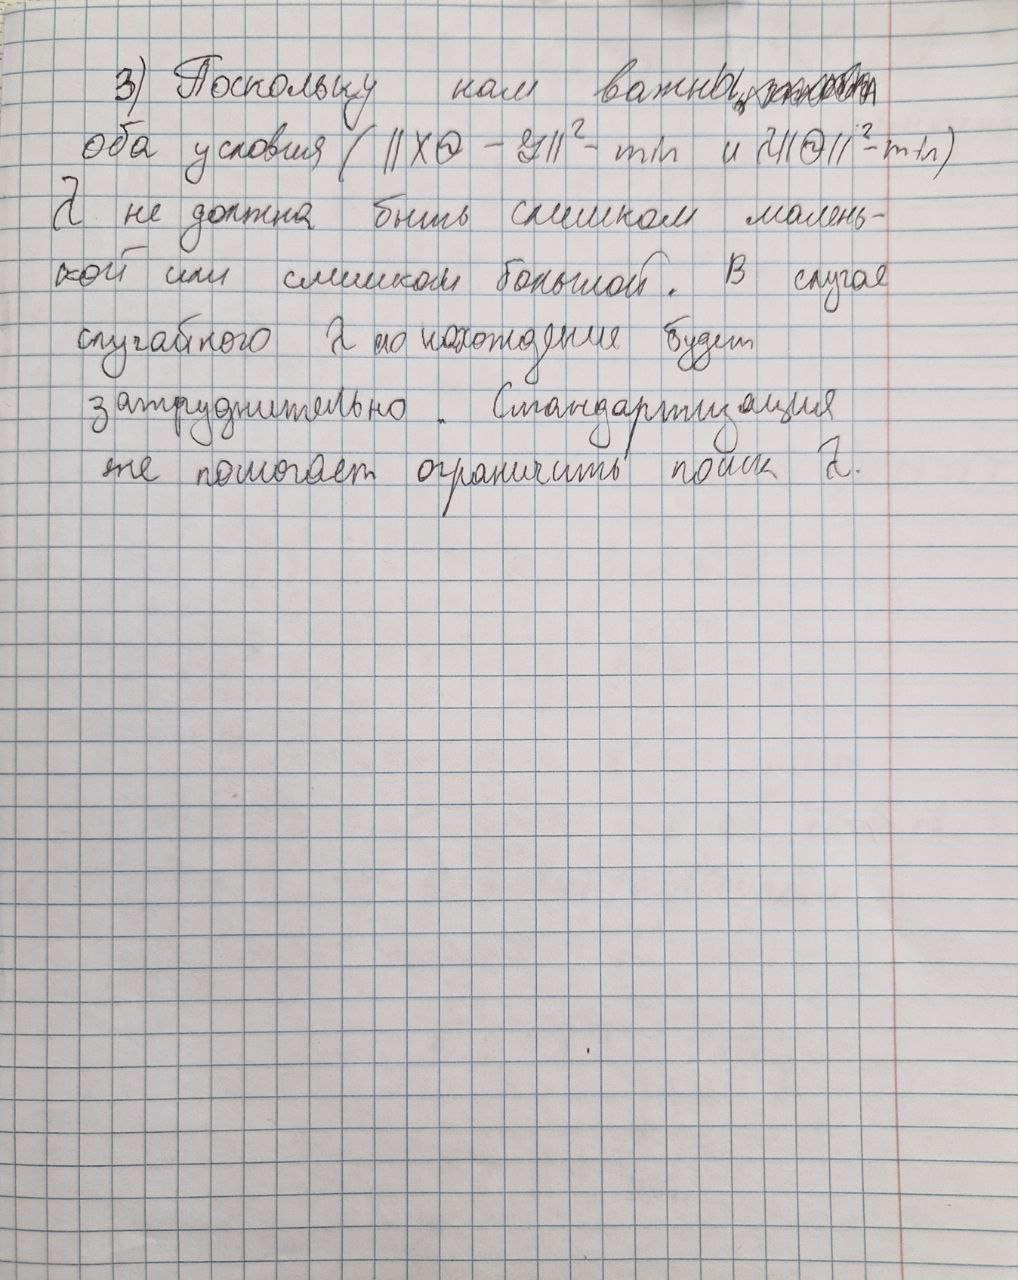

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

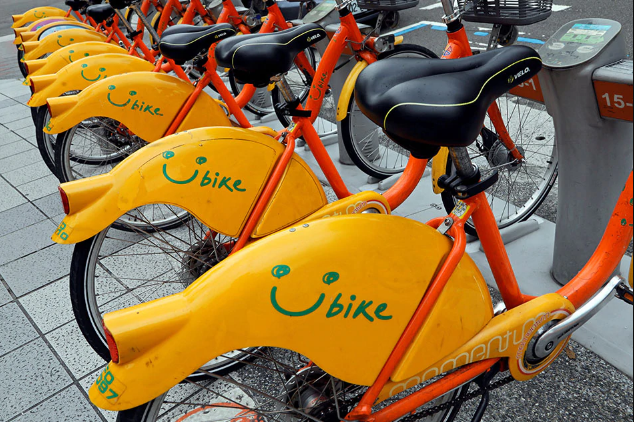

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

В методе fit нужно призвести стандартизацию признаков, затем, если от нас этого требуют, добавить дополнительный
независимый признак. После этого можно воспользоваться формулой из задания 3 для получения $\theta$.

В методе predict нужно сделать все то же самое, только возвращаем мы предсказание по явной формуле.

In [619]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
            
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        arr1 = X - np.mean(X, axis=0)
        arr2 = np.sqrt(np.var(X, axis=0))
        X = np.divide(arr1, arr2, out=np.zeros_like(arr1), where=arr2!=0)  # производим стандартизацию признаков
                
        if self.fit_intercept:
            X = np.hstack((X, np.ones(len(X)).reshape(len(X), 1)))
        
        self.theta = np.linalg.inv(np.eye(X.shape[1]) * self.lambd + X.T @ X) @ X.T @ Y  # вычисление оценки                                                                               # коэффициентов
        return self
    
    
    def predict(self, X):
        arr1 = X - np.mean(X, axis=0)
        arr2 = np.sqrt(np.var(X, axis=0))
        X = np.divide(arr1, arr2, out=np.zeros_like(arr1), where=arr2!=0)  # производим стандартизацию признаков

        if self.fit_intercept:
            X = np.hstack((X, np.ones(len(X)).reshape(len(X), 1)))
        
        predictions = X @ self.theta
        return predictions


Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/ML_pipeline.pdf">презентации</a> с занятия.

In [620]:
train, test = train_test_split(day_df, test_size=0.4)
valid, test = train_test_split(test, test_size=0.5)
print(train.shape)
print(valid.shape)
print(test.shape)

(438, 11)
(146, 11)
(147, 11)


Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее в данном задании.

Обрежем выбросы во всех 3 частях данных:

In [621]:
train['holiday'] = train['holiday'].apply(lambda x: x + 1)
train['weekday'] = train['weekday'].apply(lambda x: x + 1)
train['workingday'] = train['workingday'].apply(lambda x: x + 1)

for hue in categorial_features:  # режем данные для удаления выбросов по вещественным осям
    for real_hue in (real_features  + [target_feature]):
        low_q = train[[hue] + [real_hue]].groupby(hue).quantile(0.25)
        high_q = train[[hue] + [real_hue]].groupby(hue).quantile(0.75)
        dif = 1.5 * (high_q - low_q)
        low_q -= dif
        high_q += dif
        train['high_q'] = train[hue].apply(lambda x: high_q[real_hue].iloc[int(x) - 1])
        train['low_q'] = train[hue].apply(lambda x: low_q[real_hue].iloc[int(x) - 1])
        train = train[(train['low_q'] < train[real_hue]) & (train['high_q'] > train[real_hue])]
        train = train.drop(columns=['high_q', 'low_q'])

In [622]:
valid['holiday'] = valid['holiday'].apply(lambda x: x + 1)
valid['weekday'] = valid['weekday'].apply(lambda x: x + 1)
valid['workingday'] = valid['workingday'].apply(lambda x: x + 1)

for hue in categorial_features:  # режем данные для удаления выбросов по вещественным осям
    for real_hue in (real_features):
        low_q = valid[[hue] + [real_hue]].groupby(hue).quantile(0.25)
        high_q = valid[[hue] + [real_hue]].groupby(hue).quantile(0.75)
        dif = 1.5 * (high_q - low_q)
        low_q -= dif
        high_q += dif
        valid['high_q'] = valid[hue].apply(lambda x: high_q[real_hue].iloc[int(x) - 1])
        valid['low_q'] = valid[hue].apply(lambda x: low_q[real_hue].iloc[int(x) - 1])
        valid = valid[(valid['low_q'] < valid[real_hue]) & (valid['high_q'] > valid[real_hue])]
        valid = valid.drop(columns=['high_q', 'low_q'])

In [623]:
test['holiday'] = test['holiday'].apply(lambda x: x + 1)
test['weekday'] = test['weekday'].apply(lambda x: x + 1)
test['workingday'] = test['workingday'].apply(lambda x: x + 1)

for hue in categorial_features:  # режем данные для удаления выбросов по вещественным осям
    for real_hue in (real_features):
        low_q = test[[hue] + [real_hue]].groupby(hue).quantile(0.25)
        high_q = test[[hue] + [real_hue]].groupby(hue).quantile(0.75)
        dif = 1.5 * (high_q - low_q)
        low_q -= dif
        high_q += dif
        test['high_q'] = test[hue].apply(lambda x: high_q[real_hue].iloc[int(x) - 1])
        test['low_q'] = test[hue].apply(lambda x: low_q[real_hue].iloc[int(x) - 1])
        test = test[(test['low_q'] < test[real_hue]) & (test['high_q'] > test[real_hue])]
        test = test.drop(columns=['high_q', 'low_q'])

Применяем кодирование категориальных признаков для всех 3 частей:

In [624]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [625]:
train_cat = encoder.fit_transform(train[categorial_features])
X_train = np.hstack([train[real_features], train_cat])
Y_train = train[target_feature]

valid_cat = encoder.fit_transform(valid[categorial_features])
X_valid = np.hstack([valid[real_features], valid_cat])
Y_valid = valid[target_feature]

test_cat = encoder.fit_transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])
Y_test = test[target_feature]

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [626]:
grid = np.logspace(-2, 6, num=100)
fit_regr = [RidgeRegression(lambd=i) for i in grid]
fit_regr = [i.fit(X_train, Y_train) for i in fit_regr]

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

In [627]:
train_rmse = list()
train_mae = list()
train_mape = list()
valid_rmse = list()
valid_mae = list()
valid_mape = list()

for i in fit_regr:  # считаем значения всех 3 оценок для train и valid
    train_predict = i.predict(X_train)
    valid_predict = i.predict(X_valid)
    
    train_rmse.append(metrics.mean_squared_error(Y_train, train_predict) ** 0.5)
    train_mae.append(metrics.mean_absolute_error(Y_train, train_predict))
    train_mape.append(metrics.mean_absolute_percentage_error(Y_train, train_predict))
    
    valid_rmse.append(metrics.mean_squared_error(Y_valid, valid_predict) ** 0.5)
    valid_mae.append(metrics.mean_absolute_error(Y_valid, valid_predict))
    valid_mape.append(metrics.mean_absolute_percentage_error(Y_valid, valid_predict))

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

График для RMSE:

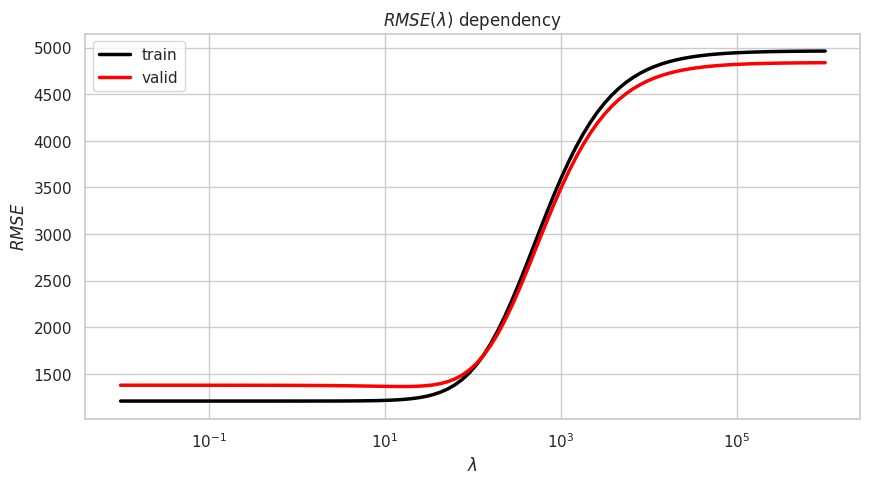

In [628]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    plt.plot(grid, train_rmse, lw=2.5, color='black', label='train')
    plt.plot(grid, valid_rmse, lw=2.5, color='red', label='valid')
    plt.xlabel('$\lambda$')
    plt.ylabel('$RMSE$')
    plt.title('$RMSE(\lambda)$ dependency')
    plt.xscale('log')
    plt.legend()


График для MAPE:

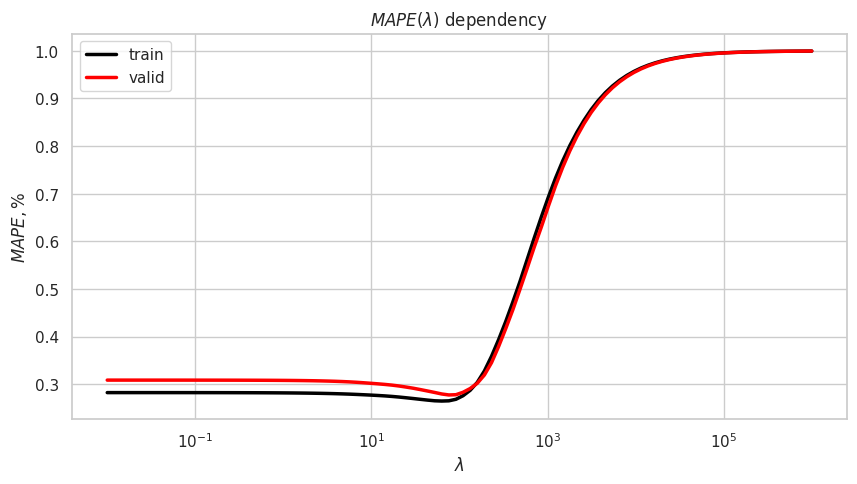

In [629]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10,5))
    plt.plot(grid, train_mape, lw=2.5, color='black', label='train')
    plt.plot(grid, valid_mape, lw=2.5, color='red', label='valid')
    plt.xlabel('$\lambda$')
    plt.ylabel('$MAPE, \%$')
    plt.title('$MAPE(\lambda)$ dependency')
    plt.xscale('log')
    plt.legend()

График для MAE:

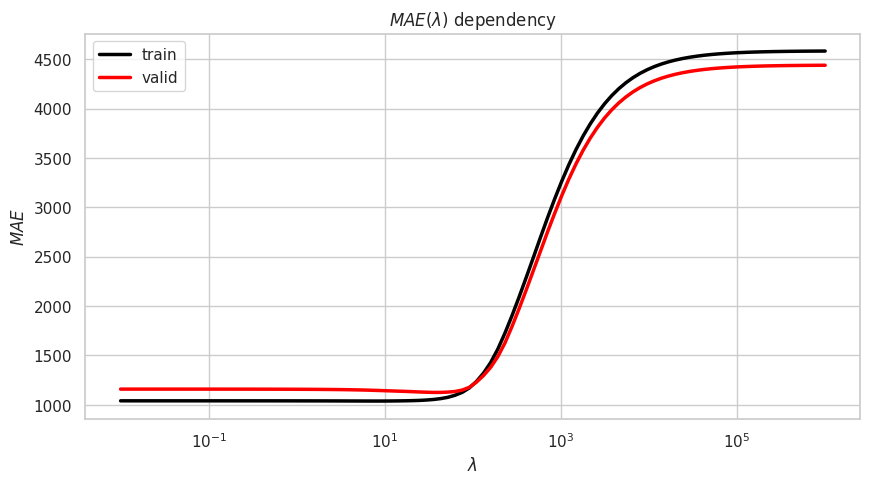

In [630]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    plt.plot(grid, train_mae, lw=2.5, color='black', label='train')
    plt.plot(grid, valid_mae, lw=2.5, color='red', label='valid')
    plt.xlabel('$\lambda$')
    plt.ylabel('$MAE$')
    plt.title('$MAE(\lambda)$ dependency')
    plt.xscale('log')
    plt.legend()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

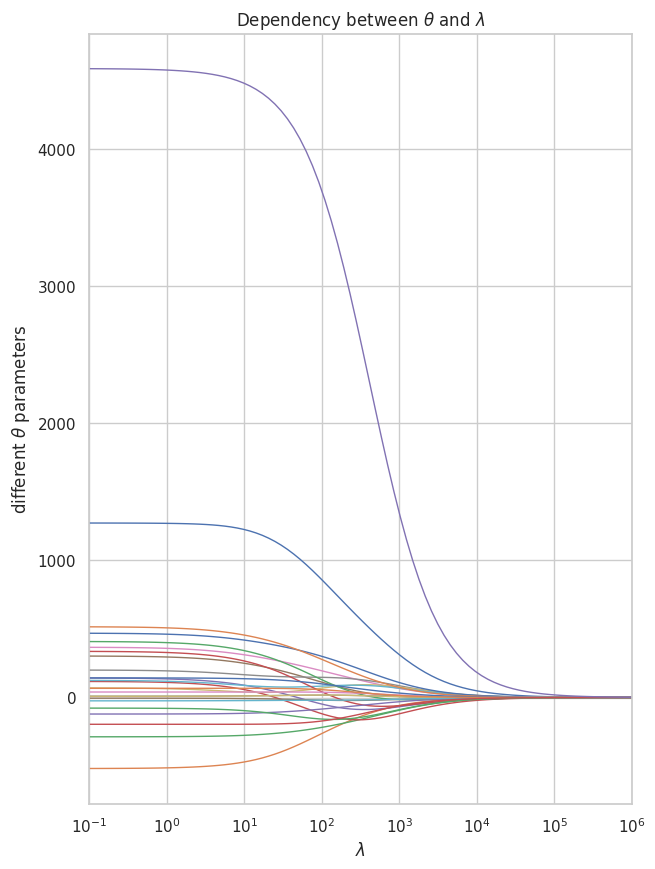

In [631]:
theta_size = fit_regr[0].theta.size
theta_arr = [i.theta for i in fit_regr]

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(7, 10))
    plt.plot(grid, theta_arr, lw=1)
    plt.xlim((0.1, 1000000))
    plt.xlabel('$\lambda$')
    plt.xscale('log')
    plt.ylabel('different $\\theta$ parameters')
    plt.title('Dependency between $\\theta$ and $\lambda$')

Мы получили демонстрацию эффекта, возникающего при значительном увеличении параметра $\lambda$, когда данные начинают играть незначительную роль и минимум $F(\theta)$ достигается при $\theta = 0$.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Значение будем выбирать по оценке MAPE.

In [632]:
lambda_opt = grid[np.argmin(valid_mape)]
lambda_opt

75.6463327554629

In [633]:
best_regr = RidgeRegression(lambd=lambda_opt)
best_regr.fit(X_train, Y_train)
prediction = best_regr.predict(X_test)

RMSE:

In [634]:
metrics.mean_squared_error(Y_test, prediction) ** 0.5

1590.608164435666

MAPE:

In [635]:
mean_absolute_percentage_error(Y_test, prediction)

28.84833405439328

MAE:

In [636]:
metrics.mean_absolute_error(Y_test, prediction)

1263.6556132534377

Сделайте выводы.

Мы посчитали предсказания целевого признака при помощи RidgeRegression. Точность нашего предсказания немного увеличилась по сравнению с методом МНК. Это можно объяснить уменьшением переобучения модели (когда большие числа специально подстраиваются под тренировочные данные).

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

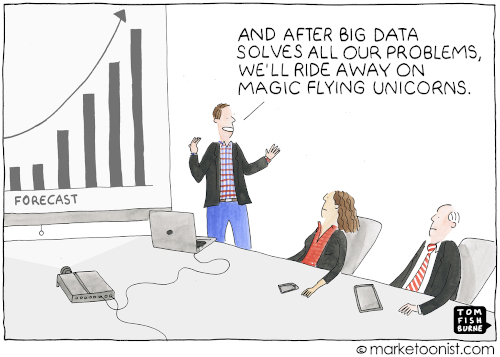

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [637]:
theta = np.zeros(X_train.shape[1] + 1)

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

In [638]:
def SGD(theta):
    eta = 0.0005
    batch = np.random.randint(0, X_train.shape[0] - 1, (256,))
    X = np.hstack([X_train[batch], np.ones((256, 1))])
    Y = Y_train.values[batch]
    return theta - eta * (X.T @ X @ theta + (lambda_opt * np.eye(X.shape[1])) @ theta - X.T @ Y)

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [639]:
train_rmse = list()
train_mae = list()
train_mape = list()
valid_rmse = list()
valid_mae = list()
valid_mape = list()

for i in range(75):  # считаем значения всех 3 оценок для train и valid
    train_predict = np.hstack((X_train, np.ones(len(X_train)).reshape(len(X_train), 1))) @ theta
    valid_predict = np.hstack((X_valid, np.ones(len(X_valid)).reshape(len(X_valid), 1))) @ theta
    
    train_rmse.append(metrics.mean_squared_error(Y_train, train_predict) ** 0.5)
    train_mae.append(metrics.mean_absolute_error(Y_train, train_predict))
    train_mape.append(metrics.mean_absolute_percentage_error(Y_train, train_predict))
    
    valid_rmse.append(metrics.mean_squared_error(Y_valid, valid_predict) ** 0.5)
    valid_mae.append(metrics.mean_absolute_error(Y_valid, valid_predict))
    valid_mape.append(metrics.mean_absolute_percentage_error(Y_valid, valid_predict))
    
    theta = SGD(theta)
    

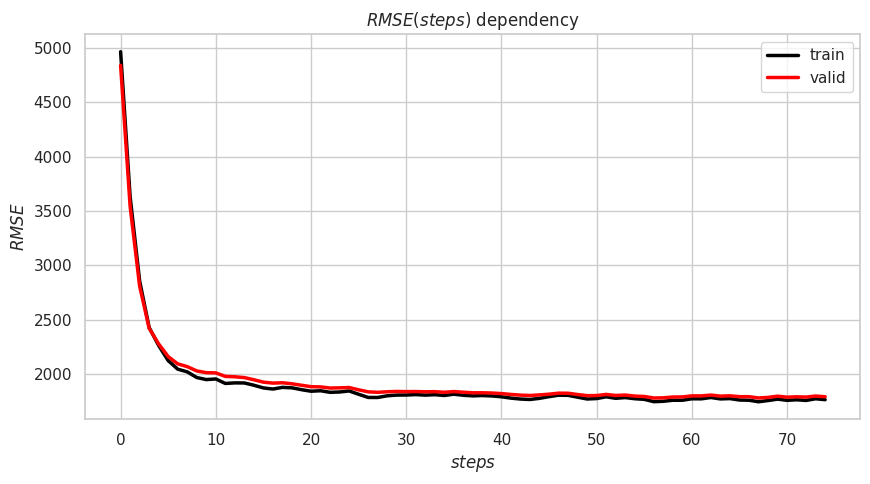

In [640]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(75), train_rmse, lw=2.5, color='black', label='train')
    plt.plot(np.arange(75), valid_rmse, lw=2.5, color='red', label='valid')
    plt.xlabel('$steps$')
    plt.ylabel('$RMSE$')
    plt.title('$RMSE(steps)$ dependency')
    plt.legend()


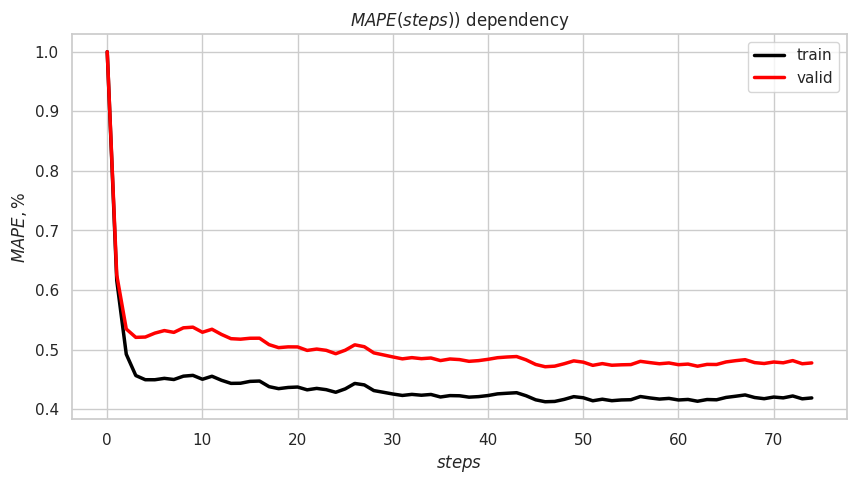

In [641]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(75), train_mape, lw=2.5, color='black', label='train')
    plt.plot(np.arange(75), valid_mape, lw=2.5, color='red', label='valid')
    plt.xlabel('$steps$')
    plt.ylabel('$MAPE, \%$')
    plt.title('$MAPE(steps))$ dependency')
    plt.legend()

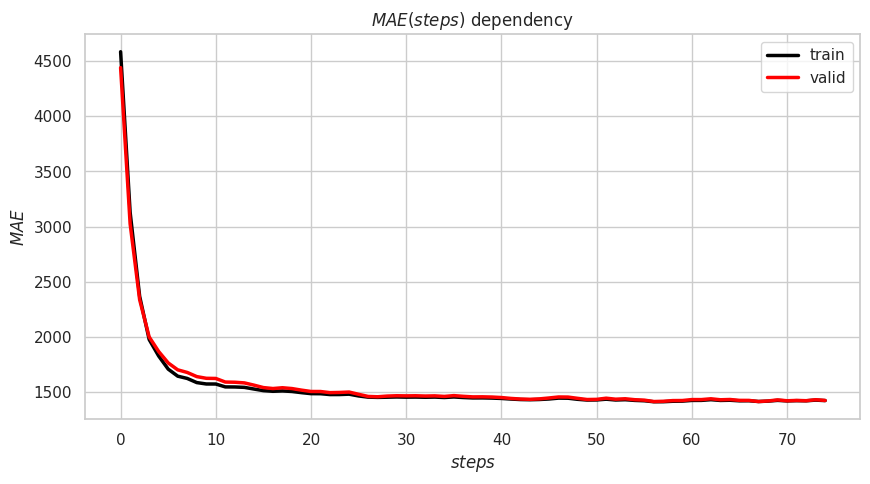

In [642]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 5))
    plt.plot(np.arange(75), train_mae, lw=2.5, color='black', label='train')
    plt.plot(np.arange(75), valid_mae, lw=2.5, color='red', label='valid')
    plt.xlabel('$steps$')
    plt.ylabel('$MAE$')
    plt.title('$MAE(steps)$ dependency')
    plt.legend()

Посчитайте ошибку на тестовой выборке.

In [643]:
prediction = np.hstack((X_test, np.ones(len(X_test)).reshape(len(X_test), 1))) @ theta

RMSE:

In [644]:
metrics.mean_squared_error(Y_test, prediction) ** 0.5

1679.635439909472

MAPE:

In [645]:
mean_absolute_percentage_error(Y_test, prediction)

41.723061542451774

MAE:

In [646]:
metrics.mean_absolute_error(Y_test, prediction)

1333.1505423681544

Сделайте выводы.

Мы использовали метод стохастического градиентного спуска для нахождения наилучшего предсказания. После 75 шагов точность предсказания уже не менялась, что говорит о том, что такое количество достаточно для построения оценки. Итоговая точность предсказания упала по сравнению с предыдущими данными, что было предсказуемо, поскольку тогда мы работали со всеми данными. Сейчас же мы хотели сделать вывод по случайной выборке.